<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/AI_TF_ImageClassifier_SparseCategorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Imagens com Keras/TensorFlow**

Acesse: https://www.tensorflow.org/tutorials/images/classification?hl=pt-br

Versão alternativa com labels (não hot encode) e `SparseCategoricalCrossentropy`.

# Código Completo

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Imagens shape: (32, 180, 180, 3)
Labels shape: (32,)
Exemplo de labels: [2 1 4 3 1]
Nomes das classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.3409 - loss: 1.5046 - val_accuracy: 0.5981 - val_loss: 1.0409
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.6132 - loss: 1.0050 - val_accuracy: 0.6335 - val_loss: 0.9057
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6864 - loss: 0.8288 - val_accuracy: 0.6580 - val_loss: 0.8518
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7356 - loss: 0.7150 - val_accuracy: 0.6594 - val_loss: 0.9107
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8043 - loss: 0.5376 - val_accuracy: 0.6199 - val_loss: 1.0632
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8929 - loss: 0.3273 - val_accuracy: 0.6431 - val_loss: 1.0810
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9341 - loss: 0.2103 - val_accuracy: 0.6649 - val_loss: 1.2080
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9599 - loss: 0.1289 - val_accuracy: 0.6676 - val_lo

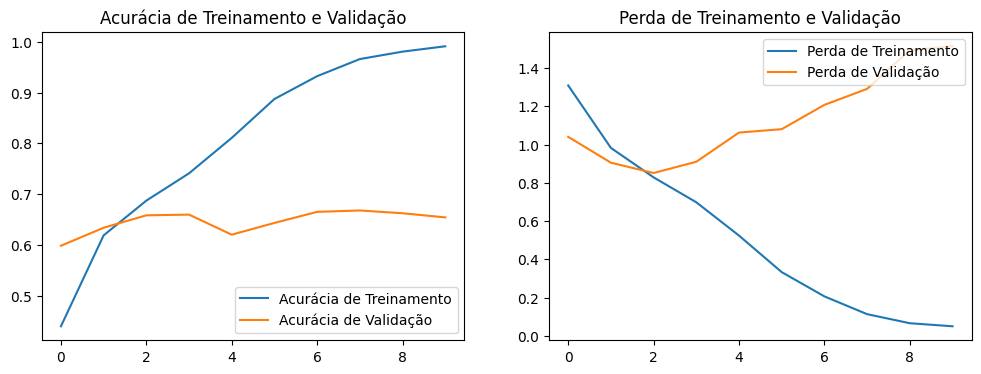

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.6127 - loss: 1.7297
Acurácia no conjunto de validação: 0.6540
Training time: 1093.16 seconds


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import pathlib
import matplotlib.pyplot as plt
import time

start_time = time.time()

# Baixar e extrair o dataset de flores
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Parâmetros de configuração
batch_size = 32
img_height = 180
img_width = 180

# Criar datasets de treino e validação
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/root/.keras/datasets/flower_photos/flower_photos',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/root/.keras/datasets/flower_photos/flower_photos',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Verificar o formato dos dados para diagnóstico
for images, labels in train_ds.take(1):
    print("Imagens shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Exemplo de labels:", labels[:5].numpy())

# Obter os nomes das classes
class_names = train_ds.class_names
print("Nomes das classes:", class_names)
num_classes = len(class_names)

# Otimizar o desempenho do dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Definir o modelo - SOLUÇÃO 1 (com softmax na saída)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Com ativação softmax
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # False porque já temos softmax
    metrics=['accuracy']
)

# Mostrar o resumo do modelo
model.summary()

# Treinar o modelo
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Plotar a acurácia e perda durante o treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treinamento e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treinamento')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treinamento e Validação')
plt.show()

# Avaliar o modelo
evaluation = model.evaluate(val_ds)
print(f"Acurácia no conjunto de validação: {evaluation[1]:.4f}")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")